In [1]:
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import enum
import math
import pandas as pd

from pycomp.viz.insights import *    #Creating custom visualizations
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error, roc_auc_score
from sklearn.metrics import roc_auc_score
from collections import Counter
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import GridSearchCV, StratifiedKFold
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12, 8]
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
PATH = 'Autism-prediction'
train_data = pd.read_csv(os.path.join(PATH, 'train (1).csv'))
test_data = pd.read_csv(os.path.join(PATH, 'test.csv'))
final_data = pd.read_csv(os.path.join(PATH, 'sample_submission.csv'))

In [3]:
train_data.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,1,18.605397,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,1,13.829369,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,1,14.679893,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,0,61.035288,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,1,14.256686,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0


In [4]:
test_data.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation
0,1,0,0,0,0,0,0,0,1,0,0,13.445319,m,Asian,no,no,United Arab Emirates,no,-0.914467,18 and more,?
1,2,1,0,0,0,1,0,0,0,0,0,25.057229,f,?,yes,no,New Zealand,no,4.553447,18 and more,Parent
2,3,1,0,0,1,0,1,0,1,0,0,28.799885,f,Asian,no,no,Austria,no,-1.581115,18 and more,Self
3,4,1,1,1,0,1,0,1,0,1,1,16.501526,f,Middle Eastern,yes,no,Bahamas,no,11.779210,18 and more,Relative
4,5,1,0,0,1,1,0,0,1,1,0,54.223869,f,White-European,no,no,Australia,no,10.717321,18 and more,Self


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [6]:
train_data.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.00000,800.000000,800.00000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.582500,0.28625,0.321250,0.41500,0.457500,0.20875,0.273750,0.717500,0.316250,0.460000,28.612306,7.058530,0.231250
std,231.0844,0.493455,0.45229,0.467249,0.49303,0.498502,0.40667,0.446161,0.450497,0.465303,0.498709,12.872373,3.788969,0.421896
min,1.0000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,9.560505,-2.594654,0.000000
25%,200.7500,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,19.282082,4.527556,0.000000
50%,400.5000,1.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,25.479960,6.893472,0.000000
75%,600.2500,1.000000,1.00000,1.000000,1.00000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,33.154755,9.892981,0.000000
max,800.0000,1.000000,1.00000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,72.402488,13.390868,1.000000


In [7]:
train_data.drop_duplicates(inplace=True)
train_data.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,1,18.605397,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,1,13.829369,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,1,14.679893,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,0,61.035288,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,1,14.256686,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0


In [8]:
def feature_count(data):
    # missing values
    total_missing_values = data.isnull().sum().sort_values(ascending = False)
    percent_missing_values = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    missing_values = pd.concat([total_missing_values, percent_missing_values], axis=1, keys=['Total', 'Percent'])
    
    #unique values 
    total_data = data.count()
    total_unique_values = pd.DataFrame(total_data)
    total_unique_values.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    total_unique_values['Uniques'] = uniques
    unique = total_unique_values
    return pd.concat([missing_values, unique], axis=1, keys=['Missing', 'UNIQUE'])

print(feature_count(train_data))

                Missing         UNIQUE        
                  Total Percent  Total Uniques
ID                    0     0.0    800     800
A1_Score              0     0.0    800       2
relation              0     0.0    800       6
age_desc              0     0.0    800       1
result                0     0.0    800     800
used_app_before       0     0.0    800       2
contry_of_res         0     0.0    800      61
austim                0     0.0    800       2
jaundice              0     0.0    800       2
ethnicity             0     0.0    800      12
gender                0     0.0    800       2
age                   0     0.0    800     800
A10_Score             0     0.0    800       2
A9_Score              0     0.0    800       2
A8_Score              0     0.0    800       2
A7_Score              0     0.0    800       2
A6_Score              0     0.0    800       2
A5_Score              0     0.0    800       2
A4_Score              0     0.0    800       2
A3_Score     

In [9]:
def cat_num(data):
    num = list(data._get_numeric_data().columns)
    cat = [cat for cat in  data.columns if cat not in (num)]
    print(f"numerical features : {num}\ntotal numerical : {len(num)}\n\ncategorical features : {cat}\n total categorical: {len(cat)}")
    return cat , num
train_cat , train_num =cat_num(train_data)

numerical features : ['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result', 'Class/ASD']
total numerical : 14

categorical features : ['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation']
 total categorical: 8


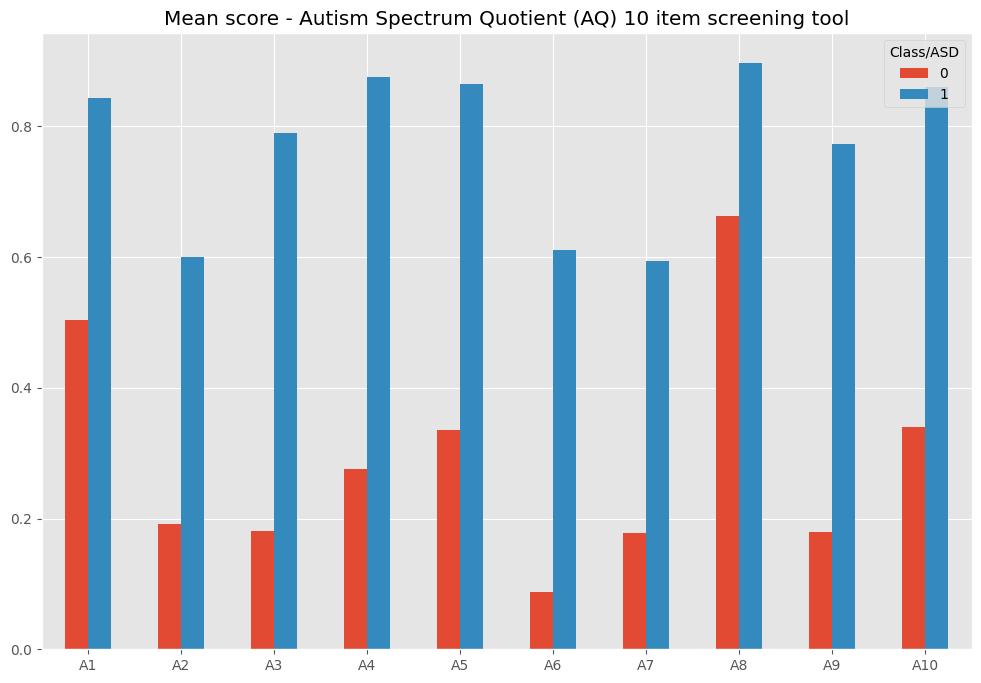

In [10]:

'''
This function will plot the distribution of numerical features, 
bigger the diifference between the two distributions, 
more likely the feature is useful for classification.
'''

score_features = train_data.filter(regex=r'A\d+_', axis=1).columns.tolist()
train_data.groupby('Class/ASD')[score_features].mean().T.plot.bar()
plt.title('Mean score - Autism Spectrum Quotient (AQ) 10 item screening tool')
plt.xticks(ticks=range(len(score_features)), labels=[x.split('_')[0] for x in score_features], rotation=0);

In [11]:
diffs = train_data.groupby('Class/ASD')[score_features].mean().T
diffs['diff'] = abs(diffs.iloc[:, 0] - diffs.iloc[:, 1])
print(diffs.sort_values('diff', ascending=False))


Class/ASD         0         1      diff
A3_Score   0.180488  0.789189  0.608701
A4_Score   0.276423  0.875676  0.599253
A9_Score   0.178862  0.772973  0.594111
A5_Score   0.334959  0.864865  0.529906
A6_Score   0.087805  0.610811  0.523006
A10_Score  0.339837  0.859459  0.519622
A7_Score   0.177236  0.594595  0.417359
A2_Score   0.191870  0.600000  0.408130
A1_Score   0.504065  0.843243  0.339178
A8_Score   0.663415  0.897297  0.233883


In [12]:
train_data['ethnicity'] = train_data['ethnicity'].str.strip().str.lower()
train_data['ethnicity'] = train_data['ethnicity'].replace('?', 'Unknown')



In [26]:
# Define your features (exclude target and ID columns)
excluded_cols = ['ID', 'Class/ASD']
features = [col for col in train_data.columns if col not in excluded_cols]


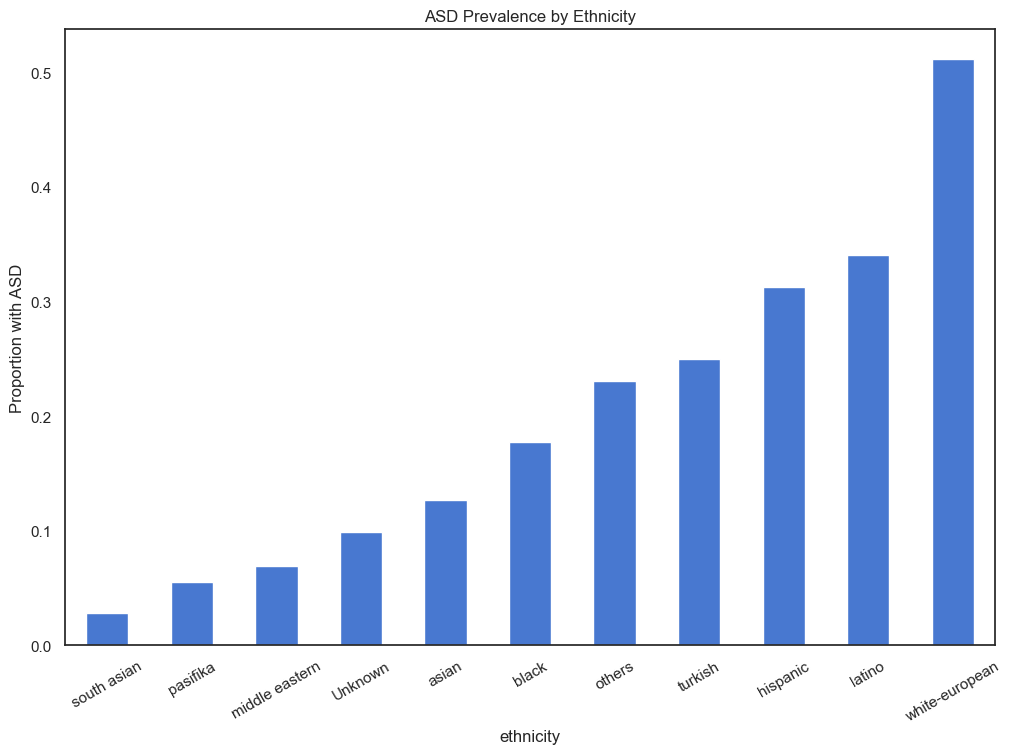

In [27]:
train_data.groupby('ethnicity')['Class/ASD'].mean().sort_values().plot.bar()
plt.title('ASD Prevalence by Ethnicity')
plt.ylabel('Proportion with ASD')
plt.xticks(rotation=30)
plt.show()


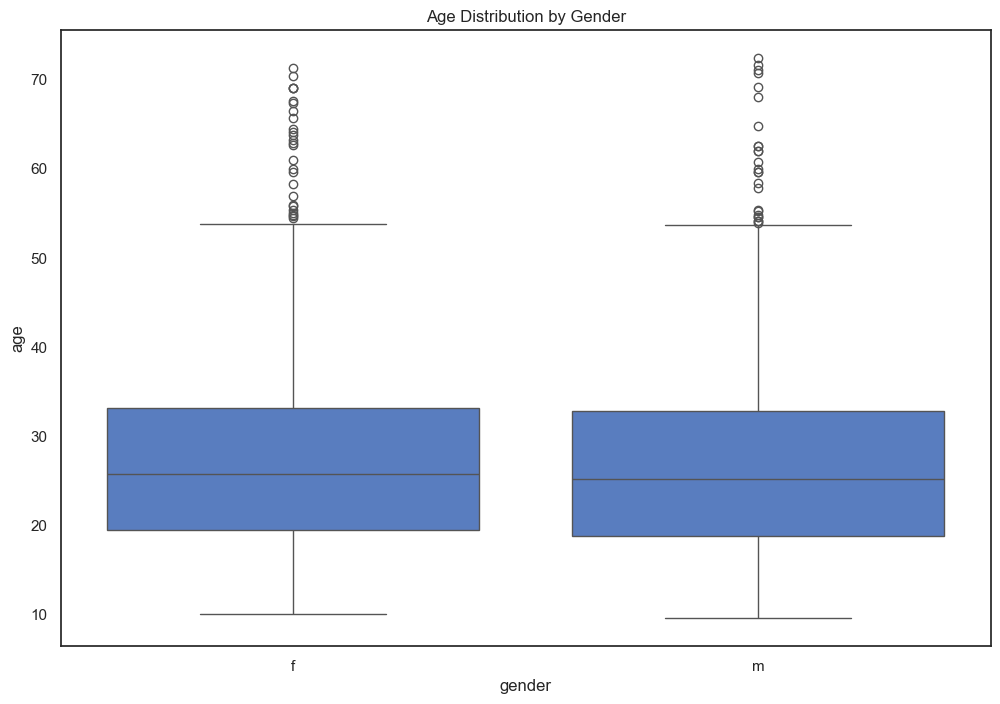

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y='age', x='gender', data=train_data)
plt.title('Age Distribution by Gender')
plt.show()


In [29]:
train_data['contry_of_res'].unique()

array(['United States', 'Australia', 'United Kingdom', 'New Zealand',
       'Italy', 'Nicaragua', 'Canada', 'United Arab Emirates',
       'Netherlands', 'Sri Lanka', 'India', 'Armenia', 'Sierra Leone',
       'Argentina', 'Azerbaijan', 'Iceland', 'Egypt', 'Serbia',
       'Afghanistan', 'Costa Rica', 'Jordan', 'Angola', 'Pakistan',
       'Brazil', 'Ireland', 'Kazakhstan', 'Viet Nam', 'Ethiopia',
       'Austria', 'Finland', 'France', 'Malaysia', 'Japan', 'Spain',
       'Philippines', 'Iran', 'Czech Republic', 'Russia', 'Romania',
       'Mexico', 'Belgium', 'Aruba', 'Uruguay', 'Indonesia', 'Ukraine',
       'AmericanSamoa', 'Germany', 'China', 'Iraq', 'Tonga',
       'South Africa', 'Saudi Arabia', 'Hong Kong', 'Bahamas', 'Ecuador',
       'Cyprus', 'Bangladesh', 'Oman', 'Bolivia', 'Sweden', 'Niger'],
      dtype=object)

In [30]:
import plotly.express as px

fig = px.treemap(
    train_data, 
    path=['contry_of_res', 'Class/ASD'], 
    color='Class/ASD',
    color_discrete_map={0: 'lightblue', 1: 'darkblue'}
)

fig.update_layout(
    title_text="Country of Residence of the Patient - Treemap",
    title_font_size=20,
    height=500, width=1000,
    template='simple_white',
    margin=dict(l=50, r=50, b=100, t=50),
    autosize=False
)

fig.show()


In [31]:
import plotly.express as px

fig = px.histogram(
    train_data,
    x="contry_of_res",
    width=900,
    height=400,
    histnorm='percent',
    template="simple_white"
)

fig.update_layout(
    title_text="COUNTRY OF RESIDENCE OF THE PATIENT - HISTOGRAM",
    font_family="San Serif",
    title_font=dict(size=20),
    legend=dict(
        orientation="v",
        y=1,
        yanchor="top",
        x=1.0,
        xanchor="right"
    )
)

fig.update_traces(marker_color='purple')
fig.update_xaxes(categoryorder='total descending')

fig.show()


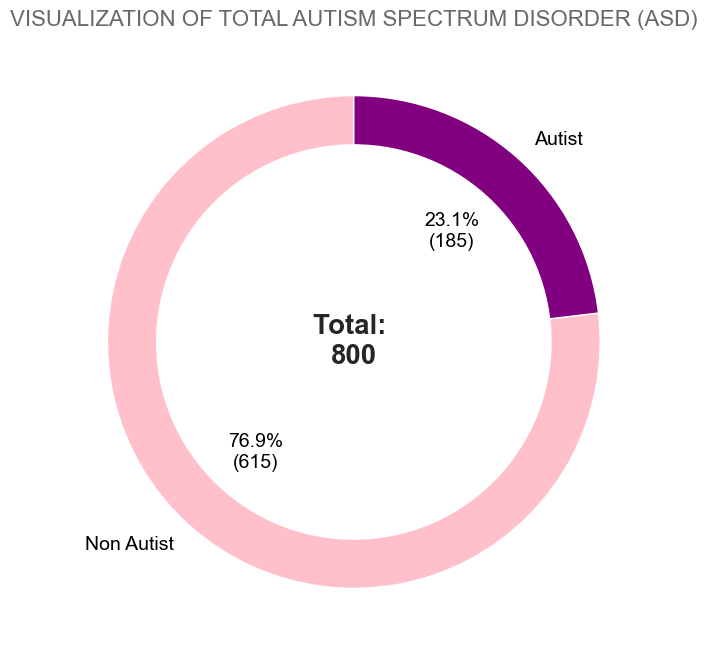

In [32]:
autism_map = {1: 'Autist', 0: 'Non Autist'}
autism_colors = ['pink', 'purple']
plot_donut_chart(df=train_data, col='Class/ASD', label_names=autism_map, colors=autism_colors,
                 title='VISUALIZATION OF TOTAL AUTISM SPECTRUM DISORDER (ASD)')

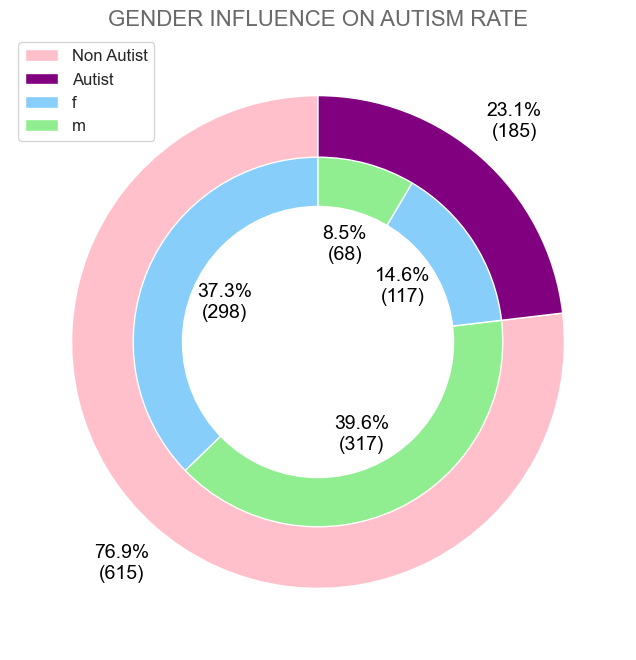

In [33]:
plot_double_donut_chart(df=train_data, col1='Class/ASD', col2='gender', label_names_col1=autism_map, 
                        colors1=['pink', 'purple'], colors2=['lightskyblue', 'lightgreen'],
                        title="GENDER INFLUENCE ON AUTISM RATE")

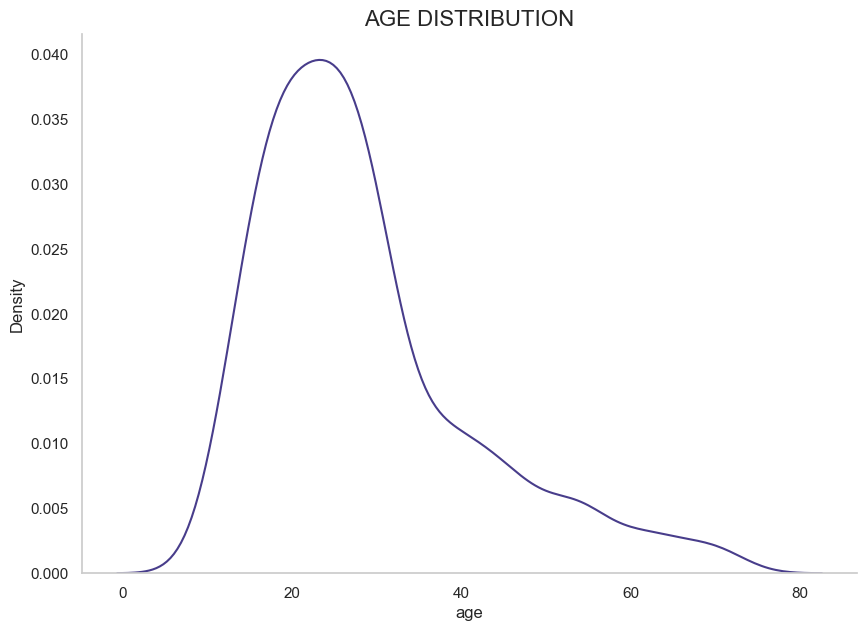

In [34]:
plot_distplot(df=train_data, col='age', title="AGE DISTRIBUTION")

Text(0.5, 1.0, ' Autism by jaundice ')

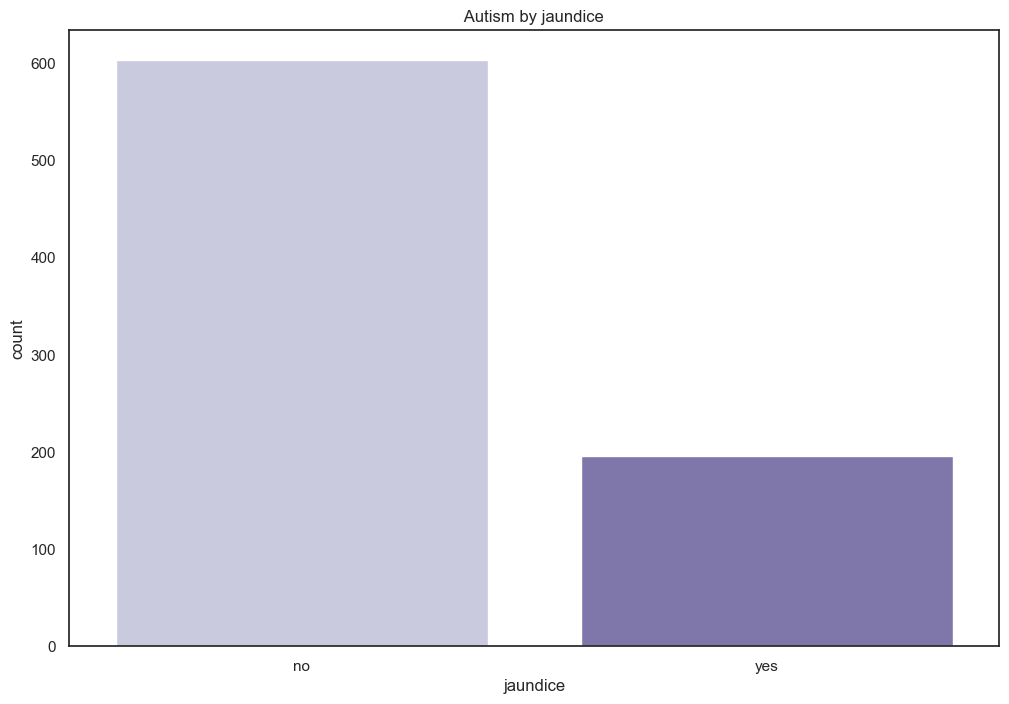

In [35]:
sns.countplot(x="jaundice",data=train_data,palette="Purples")
plt.title(' Autism by jaundice ')

Text(0.5, 1.0, 'Autism presence in the family ')

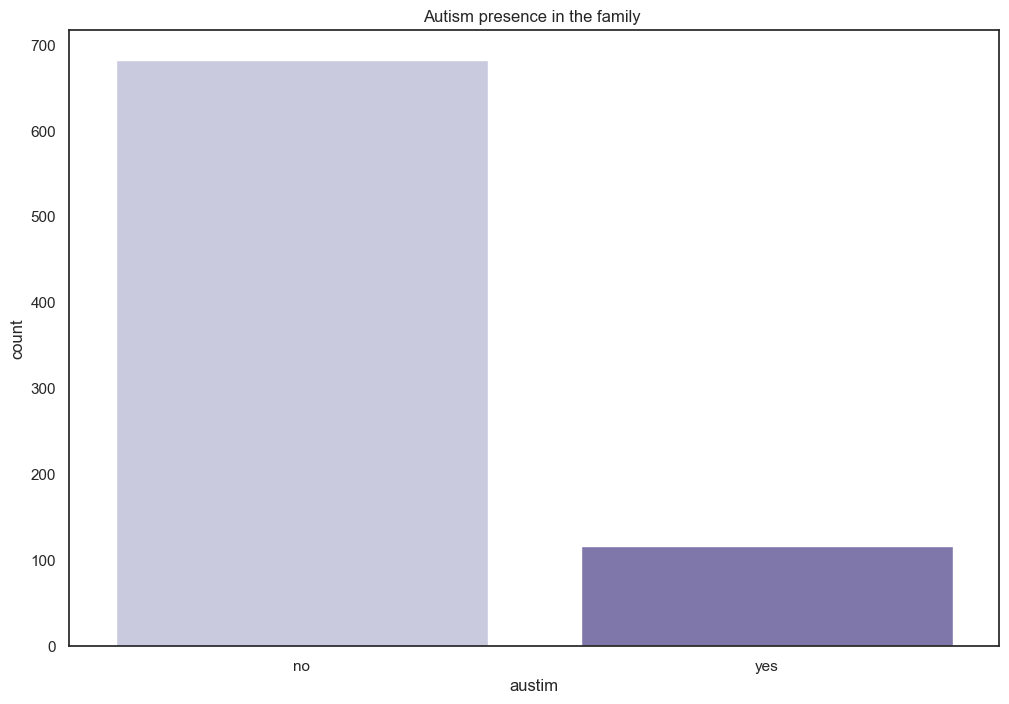

In [36]:
sns.countplot(x="austim",data=train_data,palette="Purples")
plt.title('Autism presence in the family ')

Text(0.5, 1.0, 'Autism by screening test')

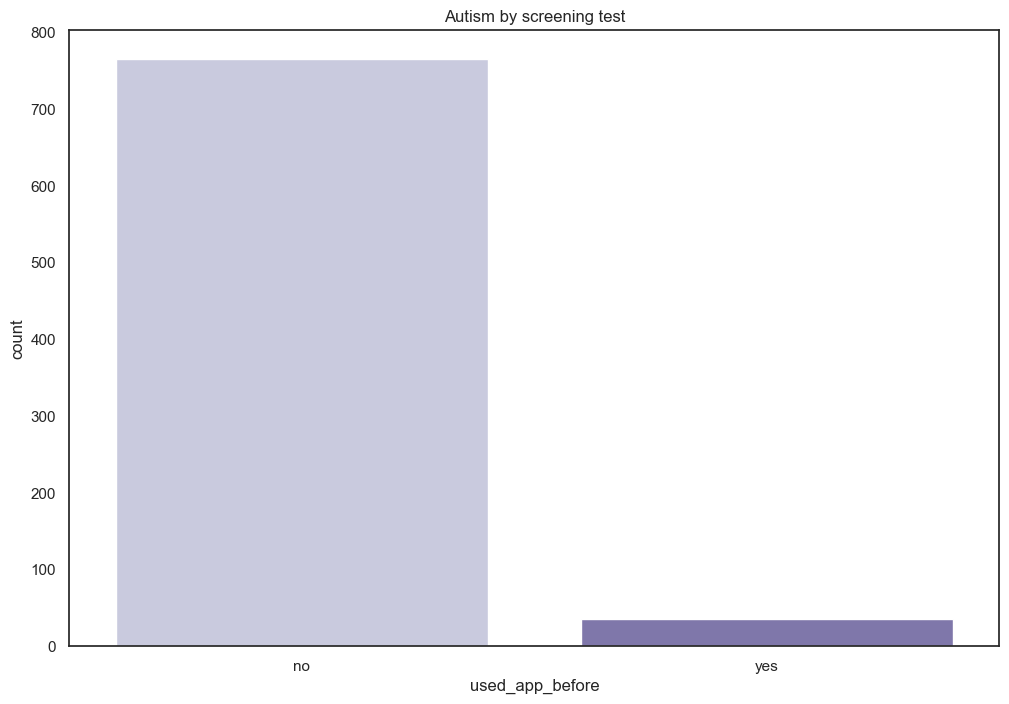

In [37]:
sns.countplot(x="used_app_before",data=train_data,palette="Purples")
plt.title('Autism by screening test')

In [42]:
from sklearn.preprocessing import OrdinalEncoder

# Combine train and test for consistent encoding
all_data = pd.concat([train_data, test_data], axis=0, ignore_index=True)

# Identify categorical columns
categorical_cols = all_data.select_dtypes(include='object').columns.tolist()

# Replace '?' or similar placeholders with 'Unknown'
all_data[categorical_cols] = all_data[categorical_cols].fillna('Unknown').astype(str)
all_data[categorical_cols] = all_data[categorical_cols].replace('?', 'Unknown')

# Apply OrdinalEncoder safely
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
all_data[categorical_cols] = encoder.fit_transform(all_data[categorical_cols])

# Split back into train and test
train_data[categorical_cols] = all_data.loc[:len(train_data)-1, categorical_cols]
test_data[categorical_cols] = all_data.loc[len(train_data):, categorical_cols].reset_index(drop=True)


In [43]:
# Initialize KFold and scoring lists
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds is typical
accuracy_scores = []
roc_auc_scores = []

# Create a DataFrame to store test predictions for each fold
df = test_data[['ID']].copy()

for fold, (tr_idx, val_idx) in enumerate(kfold.split(train_data[features], train_data['Class/ASD'])):
    print(f'FOLD: {fold + 1}')
    
    X_train = train_data.loc[tr_idx, features]
    y_train = train_data.loc[tr_idx, 'Class/ASD']
    X_val = train_data.loc[val_idx, features]
    y_val = train_data.loc[val_idx, 'Class/ASD']
    
    model = LogisticRegression(random_state=1, max_iter=1000)
    model.fit(X_train, y_train)
    
    val_pred = model.predict(X_val)
    val_prob = model.predict_proba(X_val)[:, 1]
    
    # Save fold predictions on test set for ensembling later
    df[f'fold_{fold}'] = model.predict_proba(test_data[features])[:, 1]
    
    acc = metrics.accuracy_score(y_val, val_pred)
    auc_score = metrics.roc_auc_score(y_val, val_prob)
    
    print(metrics.classification_report(y_val, val_pred))
    print(f'Fold Accuracy: {acc:.4f}')
    print(f'Fold AUC: {auc_score:.4f}\n')
    
    accuracy_scores.append(acc)
    roc_auc_scores.append(auc_score)

FOLD: 1
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       123
           1       0.69      0.73      0.71        37

    accuracy                           0.86       160
   macro avg       0.80      0.82      0.81       160
weighted avg       0.87      0.86      0.86       160

Fold Accuracy: 0.8625
Fold AUC: 0.8923

FOLD: 2
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       123
           1       0.75      0.65      0.70        37

    accuracy                           0.87       160
   macro avg       0.82      0.79      0.81       160
weighted avg       0.86      0.87      0.87       160

Fold Accuracy: 0.8688
Fold AUC: 0.9350

FOLD: 3
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       123
           1       0.82      0.76      0.79        37

    accuracy                           0.91       160
   macro avg       0.88 

------------------------------
Mean ROC AUC: 0.9149
Best ROC AUC: 0.9659
Worst ROC AUC: 0.8490
Std ROC AUC: 0.0351
------------------------------
Mean Accuracy: 0.8725
Best Accuracy: 0.9062
Worst Accuracy: 0.8625
Std Deviation Across Folds: 0.0170


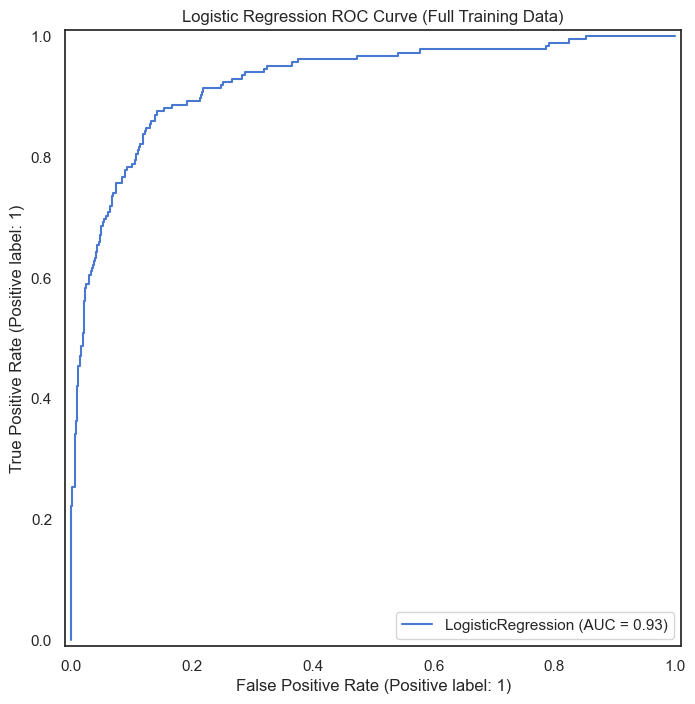

In [50]:
# After all folds: summary
print('-' * 30)
print(f'Mean ROC AUC: {np.mean(roc_auc_scores):.4f}')
print(f'Best ROC AUC: {np.max(roc_auc_scores):.4f}')
print(f'Worst ROC AUC: {np.min(roc_auc_scores):.4f}')
print(f'Std ROC AUC: {np.std(roc_auc_scores):.4f}')
print('-' * 30)
print(f'Mean Accuracy: {np.mean(accuracy_scores):.4f}')
print(f'Best Accuracy: {np.max(accuracy_scores):.4f}')
print(f'Worst Accuracy: {np.min(accuracy_scores):.4f}')
print(f'Std Deviation Across Folds: {np.std(accuracy_scores):.4f}')

# Average predictions from all folds to create final prediction
df['Class/ASD_prob'] = df.filter(regex='fold_').mean(axis=1)

# Convert probabilities to 0 or 1 based on a threshold (typically 0.5)
df['Class/ASD'] = (df['Class/ASD_prob'] >= 0.5).astype(int)

# Save only the required columns
df[['ID', 'Class/ASD']].to_csv('submission.csv', index=False)

# Optional: plot ROC curve on full training data
final_model = LogisticRegression(random_state=1, max_iter=1000)
final_model.fit(train_data[features], train_data['Class/ASD'])
RocCurveDisplay.from_estimator(final_model, train_data[features], train_data['Class/ASD'])
plt.title('Logistic Regression ROC Curve (Full Training Data)')
plt.show()

In [51]:
from sklearn.model_selection import cross_val_score

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000, random_state=1))
])

scores = cross_val_score(pipeline, train_data[features], train_data['Class/ASD'], 
                         cv=kfold, scoring='roc_auc')
print(f'Cross-validated ROC AUC: {scores.mean():.4f} ± {scores.std():.4f}')


Cross-validated ROC AUC: 0.9152 ± 0.0352
